In [1]:
import matplotlib.pyplot as plt
import numpy as np

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

In [2]:
def x_norm_pdfs(x_values, domain, std=None):
    
    # if no 'std' is given, the default one is computed
    if std==None:
        std = 1.06*np.std(x_values)*pow(len(x_values),-1/5)
   
    norm_functions = np.zeros((len(x_values), len(domain)))
    for i in range(len(x_values)):
        norm = stats.norm.pdf(domain, x_values[i], std)
        norm_functions[i] = norm

    return norm_functions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


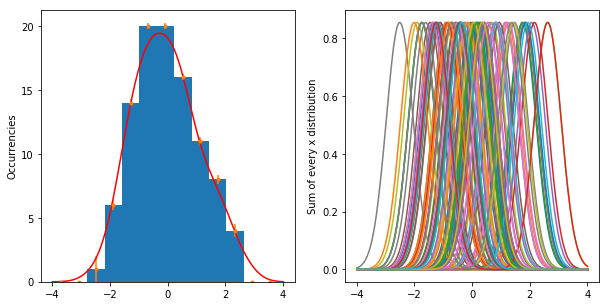

In [3]:
from scipy import stats, integrate

mean = 0
std = 1
x = np.random.normal(loc=mean, scale=std, size=100)
domain = np.linspace(-4,4,200)
#_________________________

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

#create hist, then compete errorbars
y, bin_edges, _ = ax1.hist(x, bins = domain[::15])
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
ax1.errorbar(bin_centers, y, yerr=1/np.sqrt(y), fmt=".")

ax1.set_yticks(ticks=np.arange(0,y.max()+1,5))
ax1.set_ylabel("Occurrencies")

#_________________________

norm_functions = x_norm_pdfs(x, domain)
#_________________________

ax2.plot(domain, norm_functions.T)
ax2.set_ylabel("Sum of every x distribution")
#_________________________

pdf_sum = np.sum(norm_functions, axis=0)
area_hist = integrate.trapz(y, dx=bin_edges[1]-bin_edges[0])
normed_pdf_sum = pdf_sum / integrate.trapz(pdf_sum, dx=domain[1]-domain[0]) * area_hist
ax1.plot(domain, normed_pdf_sum, 'r')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [4]:
def point_gen(N, means, std):
    
    points = np.zeros((len(means),N,2))
    for i in range(len(means)):
        points[i] = np.random.normal(loc=means[i], scale=std[i], size=(N,2))
            
    return points

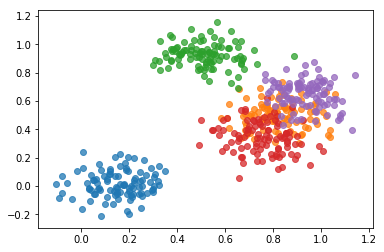

In [5]:
N_clusters = 5

# random clusters centers in [0,1) and fixed stds (for semplicity)
means = np.random.random(size=(N_clusters,2))
std = np.array([0.1]*len(means)) 
points = point_gen(100, means, std)

fig, ax = plt.subplots()
for i in range(len(points)):
    ax.scatter(points[i,:,0], points[i,:,1], alpha=0.75)

--2019-01-27 17:23:55--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2019-01-27 17:23:56--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc872c75ebbf41827d0903b779da.dl.dropboxusercontent.com/cd/0/inline/AaMzdbsXaoFJ6d8bAvgHjTIkoglOmwp_3IOJLhomP7LZAETQnKA22KrnM0UAcn2vCiimdB1YIv4_WGZFP-z7F-5NhpJojIvR1xmqyNmRZg9LkuzbJ5n03iVGRJiM3rV_PQs/file# [segue]
--2019-01-27 17:23:56--  https://uc872c75ebbf41827d0903b779da.dl.dropboxusercontent.com/cd/0/inline/AaMzdbsXaoFJ6d8bAvgHjTIkoglO

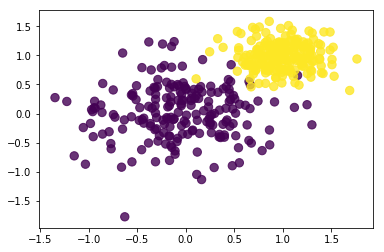

In [6]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2019-01-27 17:23:57--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [segue]
--2019-01-27 17:23:57--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf9f2458dee522318d4fd5ef85f.dl.dropboxusercontent.com/cd/0/inline/AaMdUKu-2bsdOxcTr6damVL8HZgKpXZOgY2Htqw0VZxgKQIlp5m17x0qJUI3wZ3Zg0wztcA6WzXL2ASDEpXioPl1kmJTxO5eoe4FwJQTTpStzfH0TSm-cCZsv9GSk-zdkiM/file# [segue]
--2019-01-27 17:23:58--  https://ucf9f2458dee522318d4fd5ef85f.dl.dropboxusercontent.com/cd/0/inline/AaMdUKu-2bsdOxcTr6damVL8HZgKpXZOgY2Htqw0VZxgKQIlp5m17x0qJUI3wZ3Zg0wztc

In [8]:
def f_lin(x, m, q):
    return m*x + q

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7


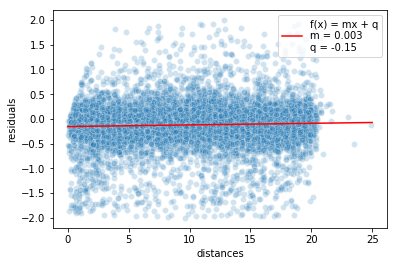

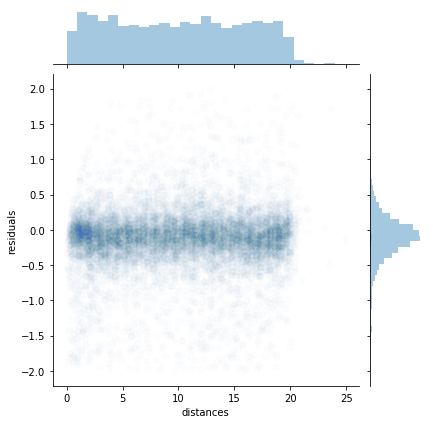

In [94]:
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

# loading Data
file = np.load('residuals_261.npy').item()
df = pd.DataFrame(file)
print(df.head())

# Filtering DF
df = df[ np.absolute(df['residuals']) < 2 ]

# Computing linear parameters
params = linregress(df['distances'],df['residuals'])

# Scatter Plot
g=sns.scatterplot(x='distances', y='residuals', data=df, alpha=0.2)
sns.lineplot(x=np.linspace(0,25,300), y=f_lin(np.linspace(0,25,300), params[0], params[1]), color='red',
             label = 'f(x) = mx + q\nm = {} \nq = {}'.format(round(params[0],3),round(params[1],2)))
plt.show()

# Building hist
bin_edges = np.linspace(0, 20, 15)
x = 0.5*(bin_edges[1:]+bin_edges[:-1])

y = np.zeros((len(x)))
err_y = np.zeros((len(x)))
for i in range(len(x)):
    slice_mask = (df['distances'].values > bin_edges[i]) & (df['distances'].values < bin_edges[i+1])
    slice_point = df[slice_mask]
    y[i] = np.mean(slice_point['residuals'].values*1.0)
    err_y[i] = np.sqrt(1/len(slice_point))

# Joint Plot
g = sns.jointplot(x='distances', y='residuals', data=df, alpha=0.01)
#g.ax_joint.(x=np.linspace(0,25,300), y=f_lin(np.linspace(0,25,300), params[0], params[1]), color='red',
#            label = 'f(x) = mx + q\nm = {} \nq = {}'.format(round(params[0],3),round(params[1],2)))
plt.bar(x, y, width=x[1]-x[0], color='r')
plt.errorbar(x, y, err_y) 
plt.show()